# **Import packages**


In [1]:
!pip install pandas
import pandas as pd
import numpy as np
import csv
!pip install ipython-sql prettytable
import prettytable
prettytable.DEFAULT = 'DEFAULT'
!pip install matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.api.types import CategoricalDtype
from IPython.core.display import display, HTML


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\schep\AppData\Local\Temp\ipykernel_45120\2045507882.py:12: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


----


# **Data Collection and Data Wrangling**

In [2]:
# inspect datasets
files_list = {"Amazon_Sale_Report": "Kaggle dataset/Amazon Sale Report.csv", 
              "Cloud_Warehouse_Compersion_Chart": "Kaggle dataset/Cloud Warehouse Compersion Chart.csv", 
              "Expense_IIGF": "Kaggle dataset/Expense IIGF.csv",
              "International_sale_Report": "Kaggle dataset/International sale Report.csv", 
              "May-2022": "Kaggle dataset/May-2022.csv", 
              "P_L_March_2021": "Kaggle dataset/P  L March 2021.csv",
              "Sale_Report": "Kaggle dataset/Sale Report.csv"}

for i, j in files_list.items():
    print(i + "-Info:")
    df = pd.read_csv(j)
    print(df.info())

    print(i + "-Unique Values:")
    example = df.nunique().to_frame(name='Count of unique values').reset_index()
    example.rename(columns={example.columns[0]: 'Column'}, inplace=True) 
    example2 = df.apply(pd.unique).to_frame(name='Unique Values').reset_index()
    example2.rename(columns={example2.columns[0]: 'Column'}, inplace=True) 
    result = pd.merge(example,example2,on='Column')
    with pd.option_context('expand_frame_repr', False):
        print(result)
    print("\n")

Amazon_Sale_Report-Info:


C:\Users\schep\AppData\Local\Temp\ipykernel_45120\856160414.py:12: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(j)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [3]:
# get table of interest into dataframe
df_Amazon_Report = pd.read_csv("Kaggle dataset/Amazon Sale Report.csv")

C:\Users\schep\AppData\Local\Temp\ipykernel_45120\4242027914.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Amazon_Report = pd.read_csv("Kaggle dataset/Amazon Sale Report.csv")


In [4]:
# check for duplicates 
df_Amazon_Report[['Order ID','ASIN']].duplicated().value_counts()

False    128968
True          7
Name: count, dtype: int64

In [5]:
# remove duplicates
df_Amazon_Report_edit = df_Amazon_Report.drop_duplicates(subset=['Order ID','ASIN'], keep='first', inplace=False)

In [6]:
# fitler columns
df_Amazon_Report_edit = df_Amazon_Report_edit[['Order ID','Amount','Date','Status','SKU','Category',
                                          'Courier Status','Qty','ship-city','ship-state','ship-postal-code','B2B']]
# df_Inter_Report_edit = df_Inter_Report[['DATE','Months','CUSTOMER','SKU','PCS','RATE','GROSS AMT']]

In [7]:
# descriptive statistics 
df_Amazon_Report_edit.describe(include = 'all')

,Order ID,Amount,Date,Status,SKU,Category,Courier Status,Qty,ship-city,ship-state,ship-postal-code,B2B
count,128968,121176.000000,128968,128968,128968,128968,122096,128968.000000,128935,128935,128935.000000,128968
unique,120378,NaN,91,13,7195,9,3,NaN,8955,69,NaN,2
top,403-4984515-8861958,NaN,05-03-22,Shipped,JNE3797-KR-L,Set,Shipped,NaN,BENGALURU,MAHARASHTRA,NaN,False
freq,12,NaN,2083,77800,773,50281,109483,NaN,11216,22259,NaN,128097
mean,NaN,648.557109,NaN,NaN,NaN,NaN,NaN,0.904449,NaN,NaN,463965.409873,NaN
std,NaN,281.210629,NaN,NaN,NaN,NaN,NaN,0.313331,NaN,NaN,191475.232007,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,110001.000000,NaN
25%,NaN,449.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,382421.000000,NaN
50%,NaN,605.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,500033.000000,NaN
75%,NaN,788.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,600024.000000,NaN


In [8]:
# check data types are correct
df_Amazon_Report_edit.dtypes

Order ID             object
Amount              float64
Date                 object
Status               object
SKU                  object
Category             object
Courier Status       object
Qty                   int64
ship-city            object
ship-state           object
ship-postal-code    float64
B2B                    bool
dtype: object

In [9]:
# change data type and formatting of column 'Date' 
df_Amazon_Report_edit['Date'] = pd.to_datetime(df_Amazon_Report_edit['Date'], format='%m-%d-%y')

In [10]:
# check for missing values
df_Amazon_Report_edit.isnull().sum()

Order ID               0
Amount              7792
Date                   0
Status                 0
SKU                    0
Category               0
Courier Status      6872
Qty                    0
ship-city             33
ship-state            33
ship-postal-code      33
B2B                    0
dtype: int64

In [11]:
# for Amount replace NaN with median 
df_Amazon_Report_edit['Amount'] = df_Amazon_Report_edit['Amount'].fillna(df_Amazon_Report_edit['Amount'].median())

In [12]:
# for Courier Status replace NaN with what is in Status column
df_Amazon_Report_edit['Courier Status'] = df_Amazon_Report_edit['Courier Status'].fillna(df_Amazon_Report_edit['Status'])

In [13]:
# for shipping info columns replace NaN with unknown
df_Amazon_Report_edit = df_Amazon_Report_edit.fillna({'ship-city': 'Unknown',
                                                      'ship-state': 'Unknown',
                                                      'ship-postal-code': 'Unknown'
                                                     })

In [14]:
# check
df_Amazon_Report_edit.isnull().sum()

Order ID            0
Amount              0
Date                0
Status              0
SKU                 0
Category            0
Courier Status      0
Qty                 0
ship-city           0
ship-state          0
ship-postal-code    0
B2B                 0
dtype: int64

In [15]:
# change ship-city and ship-state columns to uppercase (to ensure cities and states group correctly)
df_Amazon_Report_edit['ship-city'] = df_Amazon_Report_edit['ship-city'].str.upper()
df_Amazon_Report_edit['ship-state'] = df_Amazon_Report_edit['ship-state'].str.upper()

In [16]:
# add Month column
df_Amazon_Report_edit['Month'] = df_Amazon_Report_edit['Date'].dt.strftime('%b')

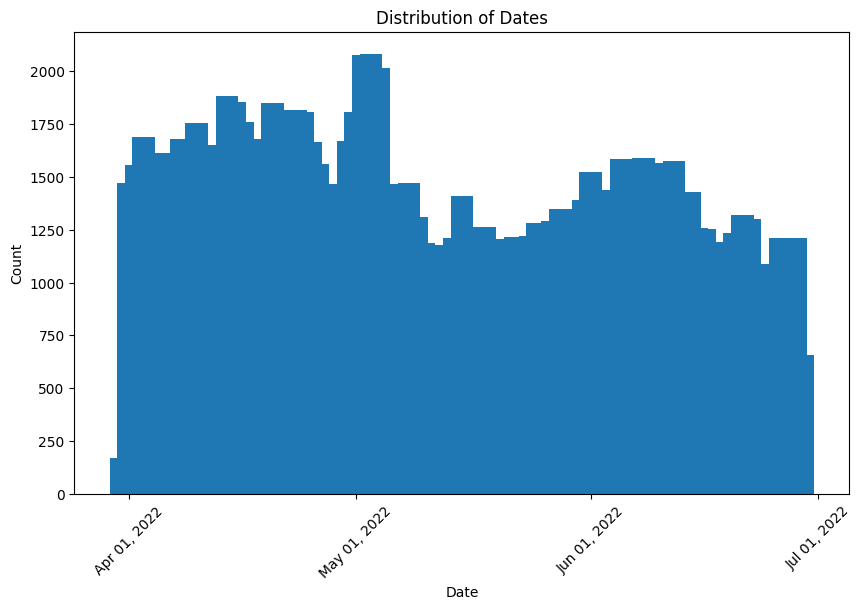

In [17]:
# check distribution of dates
date_counts = df_Amazon_Report_edit['Date'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(date_counts.index, date_counts.values, width=3)

# Format x-axis ticks to show dates correctly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))  # Format as 'Month Day, Year'
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Distribution of Dates')

plt.show()

# **EDA for Sales and Revenue Metrics**

In [18]:
# inspect Gross Sales per month
monthly_sales = df_Amazon_Report_edit.groupby('Month')['Amount'].sum().reset_index()
month_order = CategoricalDtype(categories=['Mar', 'Apr', 'May', 'Jun'], ordered=True)
monthly_sales['Month'] = monthly_sales['Month'].astype(month_order)
monthly_sales = monthly_sales.sort_values('Month')

monthly_sales['Month'] = monthly_sales['Month'].astype(str)
for month in monthly_sales['Month']:
    if month == 'Mar':
        continue
    print(f"Gross Sales in {month}: ${monthly_sales[monthly_sales['Month'] == month].iloc[0, 1]:,.0f}")

Gross Sales in Apr: $30,651,893
Gross Sales in May: $27,738,833
Gross Sales in Jun: $24,805,861


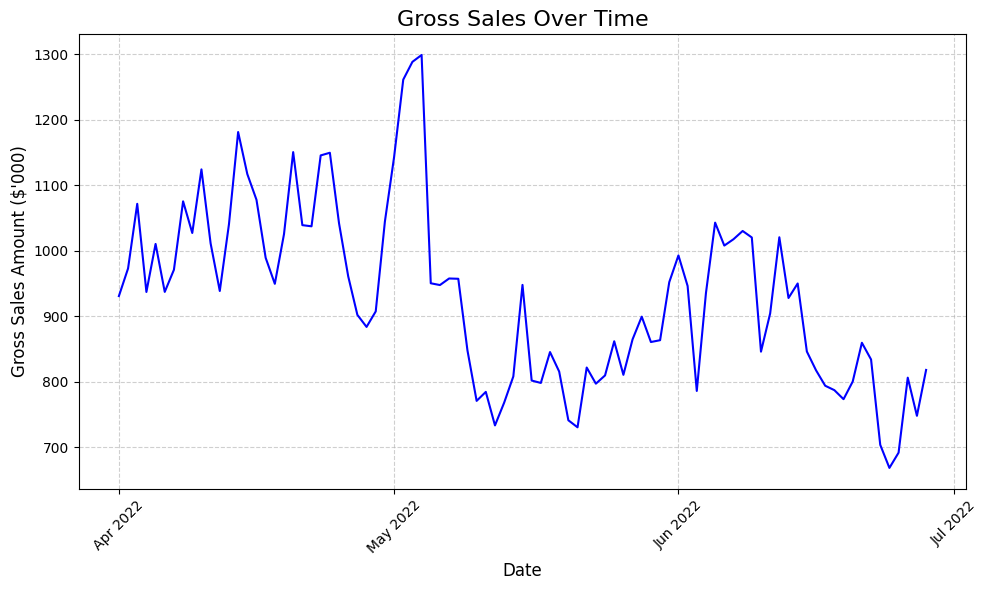

In [19]:
# gross Sales over time

# Group sales by date
daily_sales = df_Amazon_Report_edit.groupby('Date')['Amount'].sum().reset_index()

# format to thousands ('000)
daily_sales['Amount'] = daily_sales['Amount'] / 1000

# Exclude first and last date from being plotted (due to having incomplete data)
daily_sales = daily_sales[(daily_sales['Date'] != daily_sales['Date'].min()) 
                        & (daily_sales['Date'] != daily_sales['Date'].max())]

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(daily_sales['Date'], daily_sales['Amount'], linestyle='-', color='blue')

plt.title('Gross Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Gross Sales Amount ($\'000)', fontsize=12)

# Set x-axis to show only months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set ticks to months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Month Year"
plt.xticks(rotation=45)

# Add grid for clarity
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

<Figure size 1400x800 with 0 Axes>

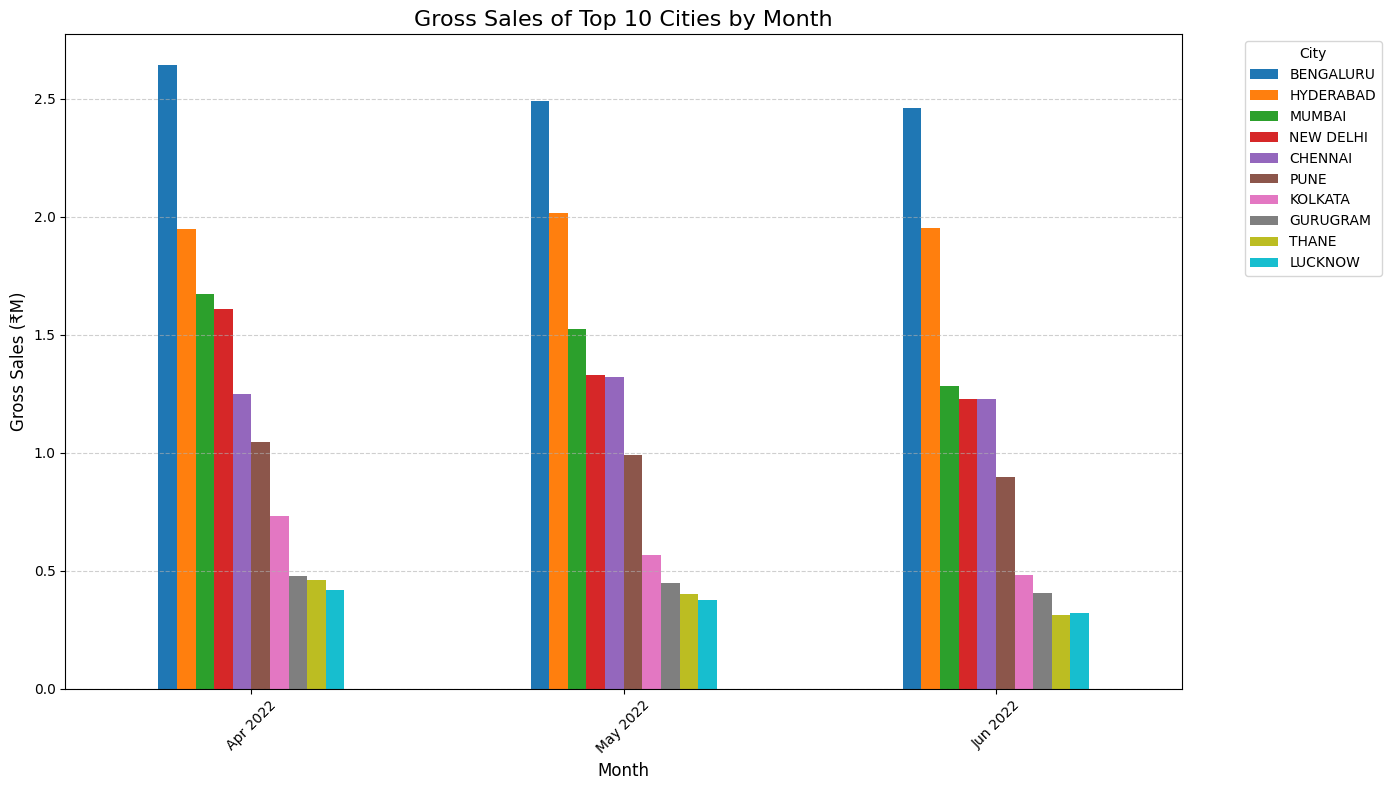

In [20]:
# Gross Sales top ten cities
top10cities = df_Amazon_Report_edit

# Ensure 'Date' is in datetime format
top10cities['Date'] = pd.to_datetime(top10cities['Date'])
top10cities['Month'] = top10cities['Date'].dt.to_period('M')  # Extract year-month for grouping

# Group sales by city
monthly_city_sales = top10cities.groupby(['Month', 'ship-city'])['Amount'].sum().reset_index()

# format to thousands ('000)
monthly_city_sales['Amount'] = monthly_city_sales['Amount'] / 1000000

# Identify the top 10 cities by total sales
city_totals = monthly_city_sales.groupby('ship-city')['Amount'].sum()
top_cities = city_totals.sort_values(ascending=False).head(10).index

# Filter the data for only the top 10 cities
top_cities_sales = monthly_city_sales[monthly_city_sales['ship-city'].isin(top_cities)]

# Sort months
month_order = CategoricalDtype(categories=['Mar', 'Apr', 'May', 'Jun'], ordered=True)
monthly_sales['Month'] = monthly_sales['Month'].astype(month_order)
monthly_sales = monthly_sales.sort_values('Month')

# Exclude 'Mar' from being plotted
top_cities_sales = top_cities_sales[top_cities_sales['Month'] != '2022-03']

# Pivot data for plotting
pivot_table = top_cities_sales.pivot(index='Month', columns='ship-city', values='Amount')

# Sort city columns in descending order by their total sales
pivot_table = pivot_table[top_cities]

# Plot the column graph
plt.figure(figsize=(14, 8))
pivot_table.plot(kind='bar', stacked=False, figsize=(14, 8), colormap='tab10')

plt.title('Gross Sales of Top 10 Cities by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel("Gross Sales (₹M)", fontsize=12)
plt.xticks(ticks=range(len(pivot_table.index)), labels=pivot_table.index.strftime('%b %Y'), rotation=45)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid lines
plt.grid(visible=True, linestyle='--', alpha=0.6, axis='y')

plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

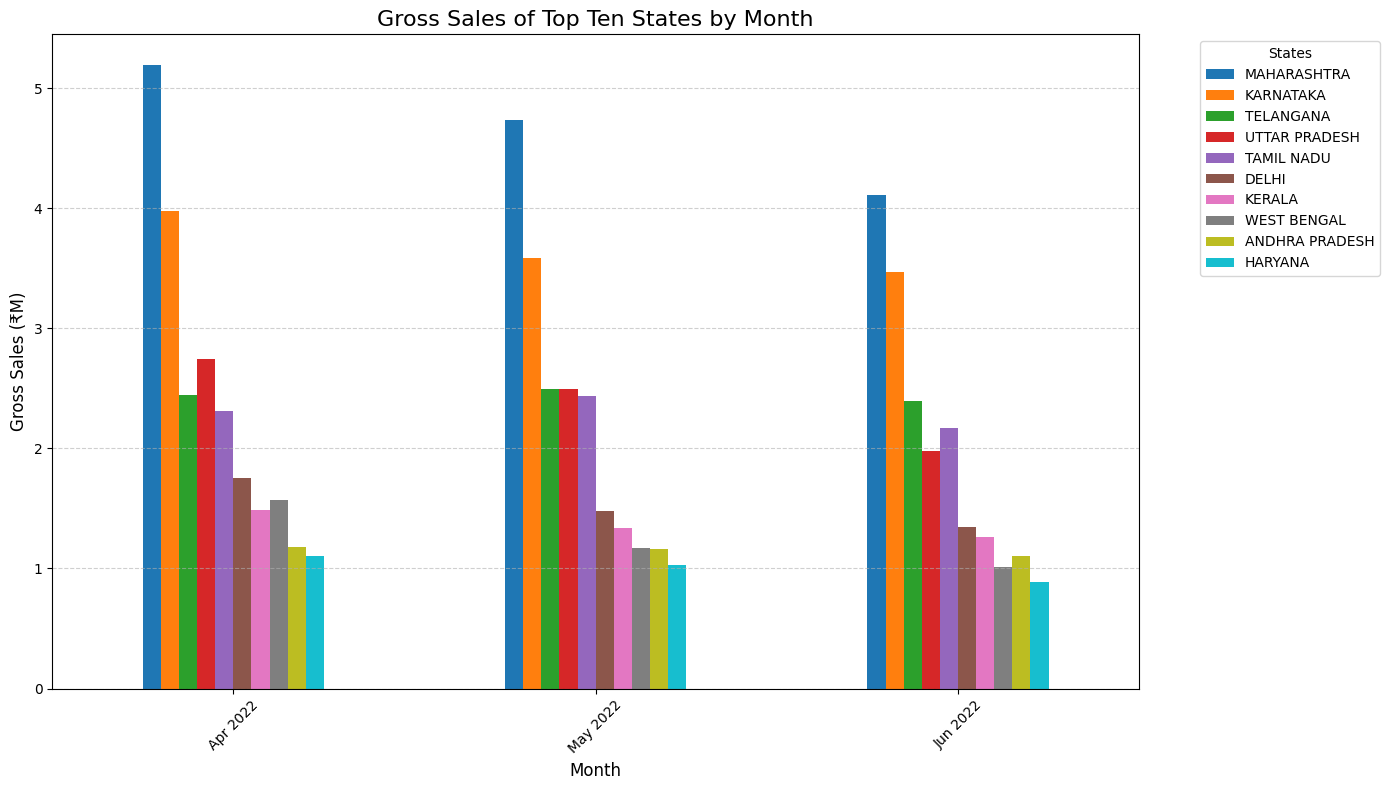

In [21]:
# Gross Sales top ten states

# df for this code
top10states = df_Amazon_Report_edit

# Ensure 'Date' is in datetime format
top10states['Date'] = pd.to_datetime(top10states['Date'])
top10states['Month'] = top10states['Date'].dt.to_period('M') 

# Group sales by city
monthly_state_sales = top10states.groupby(['Month', 'ship-state'])['Amount'].sum().reset_index()

# format to thousands ('000)
monthly_state_sales['Amount'] = monthly_state_sales['Amount'] / 1000000

# Identify the top 10 states by total sales
state_totals = monthly_state_sales.groupby('ship-state')['Amount'].sum()
top_states = state_totals.sort_values(ascending=False).head(10).index

# Filter the data for only the top 10 states
top_states_sales = monthly_state_sales[monthly_state_sales['ship-state'].isin(top_states)]

# Sort months
month_order = CategoricalDtype(categories=['Mar', 'Apr', 'May', 'Jun'], ordered=True)
monthly_sales['Month'] = monthly_sales['Month'].astype(month_order)
monthly_sales = monthly_sales.sort_values('Month')

# Exclude 'Mar' from being plotted
top_states_sales = top_states_sales[top_states_sales['Month'] != '2022-03']

# Pivot data for plotting
pivot_table = top_states_sales.pivot(index='Month', columns='ship-state', values='Amount')

# Sort states columns in descending order by their total sales
pivot_table = pivot_table[top_states]

# Plot the column graph
plt.figure(figsize=(14, 8))
pivot_table.plot(kind='bar', stacked=False, figsize=(14, 8), colormap='tab10')

plt.title('Gross Sales of Top Ten States by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel("Gross Sales (₹M)", fontsize=12)
plt.xticks(ticks=range(len(pivot_table.index)), labels=pivot_table.index.strftime('%b %Y'), rotation=45)
plt.legend(title='States', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(visible=True, linestyle='--', alpha=0.6, axis='y')

plt.tight_layout()
plt.show()

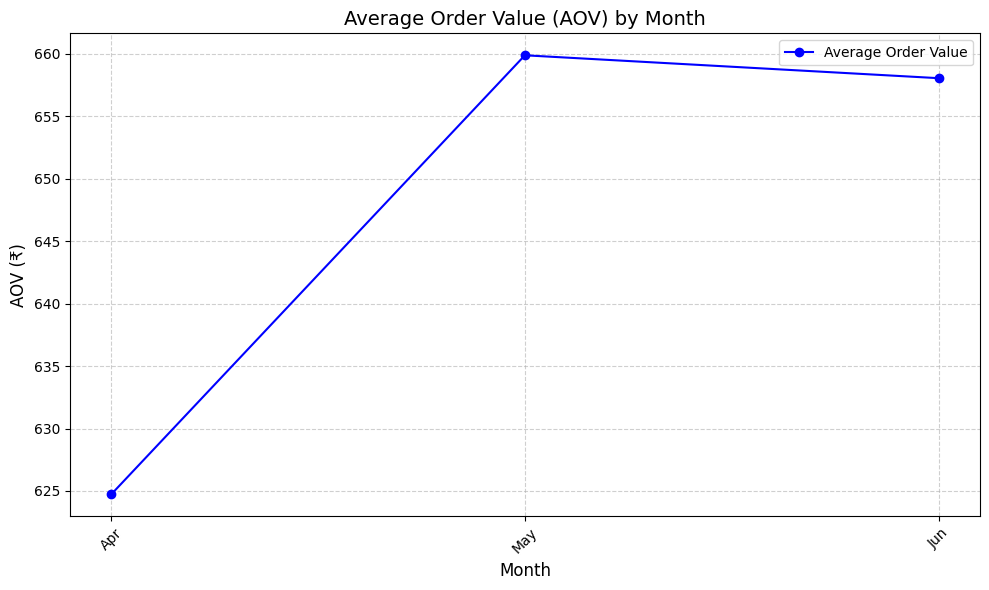

In [22]:
# Average Order Value (AOV) by month

# format 'Month' column
df_Amazon_Report_edit['Month'] = df_Amazon_Report_edit['Date'].dt.strftime('%b')

# Average Order Value (AOV): Average revenue per order = Total Revenue / Total Orders
monthly_summary = df_Amazon_Report_edit.groupby('Month').agg(
    Total_Amount=('Amount', 'sum'),
    Order_Count=('Amount', 'count')
).reset_index()
month_order = CategoricalDtype(categories=['Mar', 'Apr', 'May', 'Jun'], ordered=True)
monthly_summary['Month'] = monthly_summary['Month'].astype(month_order)
monthly_summary = monthly_summary.sort_values('Month')

monthly_summary['Month'] = monthly_summary['Month'].astype(str)

# Calculate Average Order Value (AOV)
monthly_summary['Average_Order_Value'] = monthly_summary['Total_Amount'] / monthly_summary['Order_Count']

# Exclude March
monthly_summary = monthly_summary[monthly_summary['Month'] != 'Mar']

# Plot the AOV over months
plt.figure(figsize=(10, 6))
plt.plot(monthly_summary['Month'].astype(str), 
         monthly_summary['Average_Order_Value'], 
         marker='o', linestyle='-', color='b', label='Average Order Value')

plt.title("Average Order Value (AOV) by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("AOV (₹)", fontsize=12)
plt.xticks(rotation=45)  
plt.grid(visible=True, which='major', linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
# Define the relevant Status values for successful shipments
valid_statuses = [
    "Shipped",
    "Shipped - Delivered to Buyer",
    "Shipped - Picked Up",
    "Pending",
    "Pending - Waiting for Pick Up",
    "Shipped - Out for Delivery",
    "Shipping"
]

# Filter the DataFrame to include only these statuses
shipped_orders_df = df_Amazon_Report_edit[df_Amazon_Report_edit['Status'].isin(valid_statuses)]
shipped_orders_df = shipped_orders_df.reset_index(drop=True)

# Verify the filtered data
print(f"Total orders: {df_Amazon_Report_edit.shape[0]}")
print(f"Total shipped orders: {shipped_orders_df.shape[0]}\n")
print(shipped_orders_df['Status'].value_counts())

Total orders: 128968
Total shipped orders: 108524

Status
Shipped                          77800
Shipped - Delivered to Buyer     28769
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Out for Delivery          35
Shipping                             8
Name: count, dtype: int64


In [24]:
# Net Revenue by month

# Change Month column back to 3 letter abbreviation
shipped_orders_df['Month'] = shipped_orders_df['Date'].dt.strftime('%b')

monthly_sales = shipped_orders_df.groupby('Month')['Amount'].sum().reset_index()
month_order = CategoricalDtype(categories=['Mar', 'Apr', 'May', 'Jun'], ordered=True)
monthly_sales['Month'] = monthly_sales['Month'].astype(month_order)
monthly_sales = monthly_sales.sort_values('Month')

monthly_sales['Month'] = monthly_sales['Month'].astype(str)
for month in monthly_sales['Month']:
    if month == 'Mar':
        continue
    print(f"Net Sales in {month}: ₹{monthly_sales[monthly_sales['Month'] == month].iloc[0, 1]:,.0f}")

Net Sales in Apr: ₹25,724,302
Net Sales in May: ₹23,510,970
Net Sales in Jun: ₹21,089,250


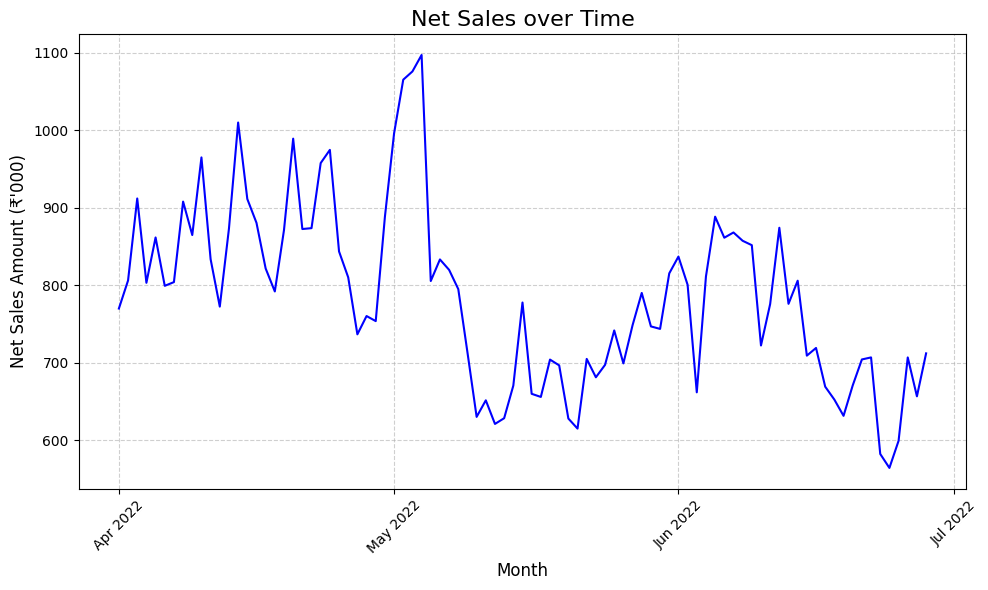

In [25]:
# Net Revenue over time

# Group sales by date
daily_sales = shipped_orders_df.groupby('Date')['Amount'].sum().reset_index()

# format to thousands ('000)
daily_sales['Amount'] = daily_sales['Amount'] / 1000

# Exclude first and last date from being plotted (due to having incomplete data)
daily_sales = daily_sales[(daily_sales['Date'] != daily_sales['Date'].min()) 
                        & (daily_sales['Date'] != daily_sales['Date'].max())]

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(daily_sales['Date'], daily_sales['Amount'], linestyle='-', color='blue')

# Customize the plot
plt.title('Net Sales over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Net Sales Amount (₹\'000)', fontsize=12)

# Set x-axis to show only months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set ticks to months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Month Year"
plt.xticks(rotation=45)

plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

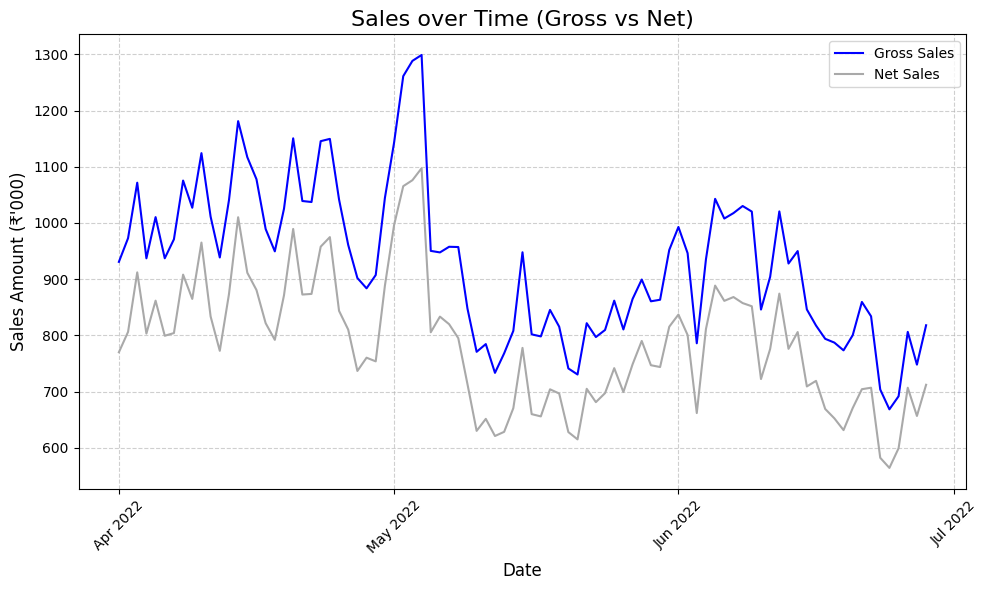

In [26]:
# plot gross and net sales together
# Group sales by date for both Gross and Net
daily_sales_gross = df_Amazon_Report_edit.groupby('Date')['Amount'].sum().reset_index()
daily_sales_net = shipped_orders_df.groupby('Date')['Amount'].sum().reset_index()

# Format to thousands ('000)
daily_sales_gross['Amount'] = daily_sales_gross['Amount'] / 1000
daily_sales_net['Amount'] = daily_sales_net['Amount'] / 1000

# Exclude first and last date from being plotted (due to having incomplete data)
daily_sales_gross = daily_sales_gross[(daily_sales_gross['Date'] != daily_sales_gross['Date'].min()) 
                                      & (daily_sales_gross['Date'] != daily_sales_gross['Date'].max())]
daily_sales_net = daily_sales_net[(daily_sales_net['Date'] != daily_sales_net['Date'].min()) 
                                  & (daily_sales_net['Date'] != daily_sales_net['Date'].max())]

# Plot the line graph
plt.figure(figsize=(10, 6))

# Plot Gross Sales (in blue)
plt.plot(daily_sales_gross['Date'], daily_sales_gross['Amount'], linestyle='-', color='blue', label='Gross Sales')

# Plot Net Sales (in dark grey)
plt.plot(daily_sales_net['Date'], daily_sales_net['Amount'], linestyle='-', color='darkgrey', label='Net Sales')

# Customize the plot
plt.title('Sales over Time (Gross vs Net)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales Amount (₹\'000)', fontsize=12)

# Set x-axis to show only months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set ticks to months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as "Month Year"
plt.xticks(rotation=45)

plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
# Create table including gross, net, order count, AOV, and sales MoM %

# Formatting: Add CSS for background and styling
custom_css2 = """
<h3>Sales Trends</h3>
<style>
    /* Force white background and text color for the entire table */
    table {
        border-collapse: collapse;
        margin: 25px 0;
        font-size: 16px;
        font-family: Arial, sans-serif;
        min-width: 400px;
        box-shadow: 0 0 20px rgba(0, 0, 0, 0.15);
        background-color: white !important; /* Force white background */
        color: black !important; /* Ensure black text */
    }

    /* Header row styling */
    table thead tr {
        background-color: #d3d3d3;  /* Darker grey background for header */
        color: black;  /* Black text for header */
        text-align: left;
    }

    /* Style for header and body cells */
    table th, table td {
        padding: 12px 15px;
        border: 1px solid #ddd;  /* Border for better separation */
    }

    /* Style for body rows */
    table tbody tr {
        background-color: white !important;  /* Enforce white background */
        color: black !important;  /* Ensure black text */
    }

    /* Striped rows (alternate colors) */
    table tbody tr:nth-of-type(even) {
        background-color: #f3f3f3 !important;  /* Light gray for even rows */
    }

    /* Highlight row on hover */
    table tbody tr:hover {
        background-color: #f1f1f1 !important;
    }

</style>
"""

In [28]:
# Create Sales Trends Table

# Add a 'Month' column to both dataframes
df_Amazon_Report_edit['Month'] = df_Amazon_Report_edit['Date'].dt.strftime('%b')
shipped_orders_df['Month'] = shipped_orders_df['Date'].dt.strftime('%b')

# Define month order for sorting
month_order = CategoricalDtype(categories=['Mar', 'Apr', 'May', 'Jun'], ordered=True)

# Gross Sales
gross_sales = df_Amazon_Report_edit.groupby('Month')['Amount'].sum().reset_index()
gross_sales['Month'] = gross_sales['Month'].astype(month_order)
gross_sales = gross_sales.sort_values('Month')

# Net Sales
net_sales = shipped_orders_df.groupby('Month')['Amount'].sum().reset_index()
net_sales['Month'] = net_sales['Month'].astype(month_order)
net_sales = net_sales.sort_values('Month')

# Average Order Value and Order Count
monthly_summary = df_Amazon_Report_edit.groupby('Month').agg(
    Total_Amount=('Amount', 'sum'),
    Order_Count=('Amount', 'count')
).reset_index()
monthly_summary['Month'] = monthly_summary['Month'].astype(month_order)
monthly_summary = monthly_summary.sort_values('Month')
monthly_summary['Average_Order_Value'] = monthly_summary['Total_Amount'] / monthly_summary['Order_Count']

# Merge the dataframes
result = pd.merge(gross_sales, net_sales, on='Month', suffixes=('_Gross', '_Net'))
result = pd.merge(result, monthly_summary[['Month', 'Order_Count', 'Average_Order_Value']], on='Month')

# Exclude March
result = result[result['Month'] != 'Mar']

# Calculate Month-over-Month (MoM) changes
result['Gross_Sales_MoM'] = result['Amount_Gross'].pct_change() * 100
result['Net_Sales_MoM'] = result['Amount_Net'].pct_change() * 100

# Rename columns for clarity
result.rename(columns={
    'Amount_Gross': 'Gross_Sales',
    'Amount_Net': 'Net_Sales'
}, inplace=True)

# Apply formatting to the columns
def format_currency(value):
    return f"₹{value:,.0f}"

def format_percentage(value):
    if value < 0:
        return f'<span style="color:red;">{value:.0f}%</span>'
    return f"{value:.0f}%"

result['Gross_Sales'] = result['Gross_Sales'].apply(format_currency)
result['Net_Sales'] = result['Net_Sales'].apply(format_currency)
result['Average_Order_Value'] = result['Average_Order_Value'].apply(format_currency)
result['Gross_Sales_MoM'] = result['Gross_Sales_MoM'].fillna(0).apply(format_percentage)
result['Net_Sales_MoM'] = result['Net_Sales_MoM'].fillna(0).apply(format_percentage)

# Generate HTML table and combine with the custom CSS
styled_html_table = custom_css2 + result.to_html(escape=False, index=False, justify='center')

# Display the table with custom styling
display(HTML(styled_html_table))

Month,Gross_Sales,Net_Sales,Order_Count,Average_Order_Value,Gross_Sales_MoM,Net_Sales_MoM
Apr,"₹30,651,893","₹25,724,302",49065,₹625,0%,0%
May,"₹27,738,833","₹23,510,970",42036,₹660,-10%,-9%
Jun,"₹24,805,861","₹21,089,250",37696,₹658,-11%,-10%


# **EDA for Product Metrics**

Category        Set     kurta  Western Dress       Top  Ethnic Dress  \
Month                                                                  
Apr       16.304066  8.766740       3.057856  1.926558      0.263372   
May       13.261069  7.216157       4.580954  2.105112      0.306402   
Jun       11.539573  7.190753       4.051189  1.588096      0.260275   

Category    Blouse    Bottom     Saree   Dupatta  
Month                                             
Apr       0.207683  0.068753  0.056865       NaN  
May       0.169475  0.056312  0.043352       NaN  
Jun       0.108195  0.037703  0.029162  0.000915  


<Figure size 1400x800 with 0 Axes>

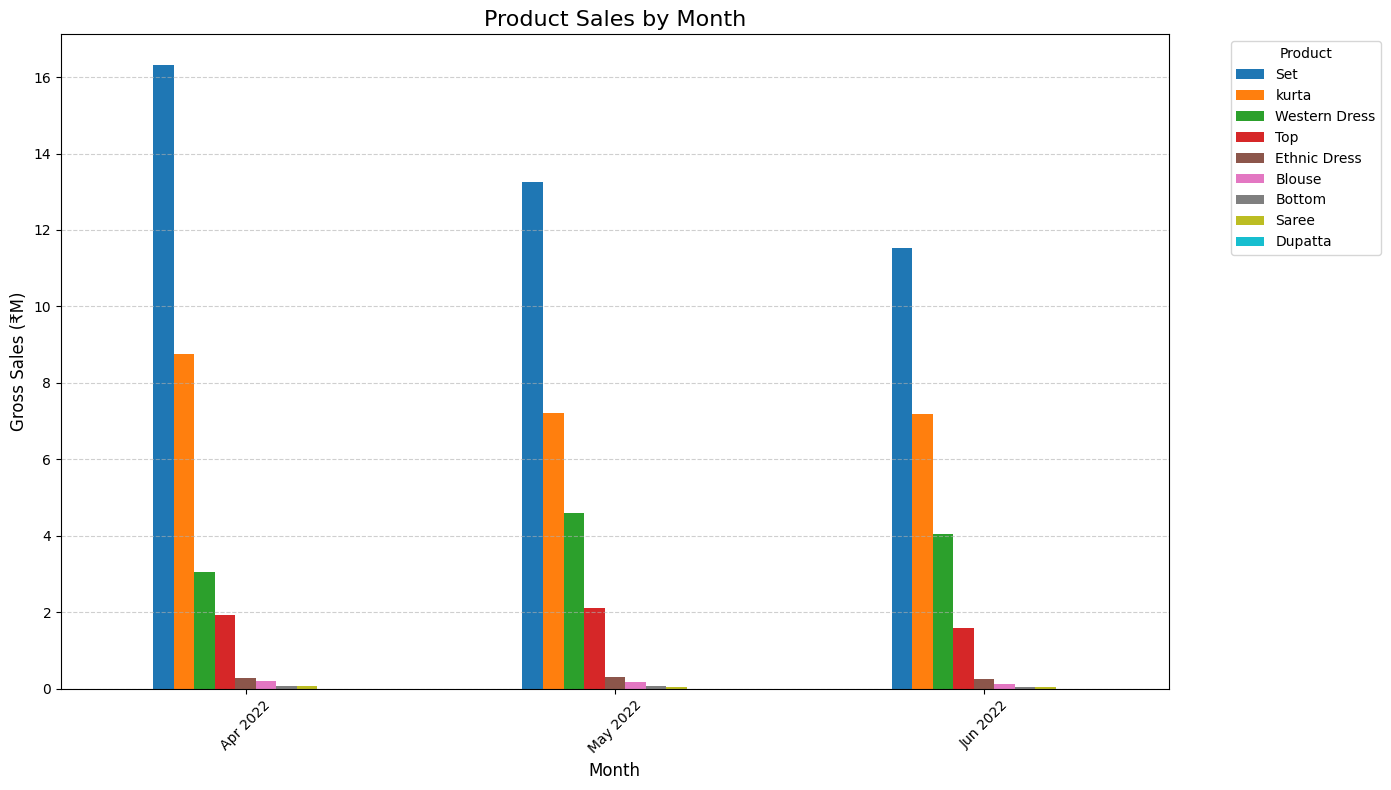

In [29]:
# Format 'Month' column
df_Amazon_Report_edit['Month'] = df_Amazon_Report_edit['Date'].dt.strftime('%b')

# Best-selling products (by category) over time
products_summary = df_Amazon_Report_edit.groupby(['Month', 'Category'])['Amount'].sum().reset_index()

# format to thousands ('000)
products_summary['Amount'] = products_summary['Amount'] / 1000000

# Exclude March before creating the pivot table
products_summary = products_summary[products_summary['Month'] != 'Mar']

# Ensure the 'Month' column has the correct order for the remaining months
month_order = ['Apr', 'May', 'Jun'] 

# Set the 'Month' column as a Categorical type with the correct order
products_summary['Month'] = pd.Categorical(products_summary['Month'], categories=month_order, ordered=True)

# Create the pivot table
products_summary_pivot = products_summary.pivot(index='Month', columns='Category', values='Amount')

# Create the product totals sorted in descending order
product_totals = products_summary.groupby('Category')['Amount'].sum()
product_totals = product_totals.sort_values(ascending=False).index

# Sort the pivot table columns by the product totals
products_summary_pivot = products_summary_pivot[product_totals]

# Ensure the rows are sorted by 'Month' in the correct order
products_summary_pivot = products_summary_pivot.loc[month_order]

print(products_summary_pivot)

# Plot the column graph
plt.figure(figsize=(14, 8))
products_summary_pivot.plot(kind='bar', stacked=False, figsize=(14, 8), colormap='tab10')

plt.title('Product Sales by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel("Gross Sales (₹M)", fontsize=12)
plt.xticks(ticks=range(len(month_order)), labels=[f"{month} 2022" for month in month_order], rotation=45) 
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(visible=True, linestyle='--', alpha=0.6, axis='y')

plt.tight_layout()
plt.show()


Category    Set  kurta  Western Dress   Top
Month                                      
Apr       20203  19746           4164  3928
May       16015  14930           6059  4055
Jun       13988  15121           5268  2630


<Figure size 1400x800 with 0 Axes>

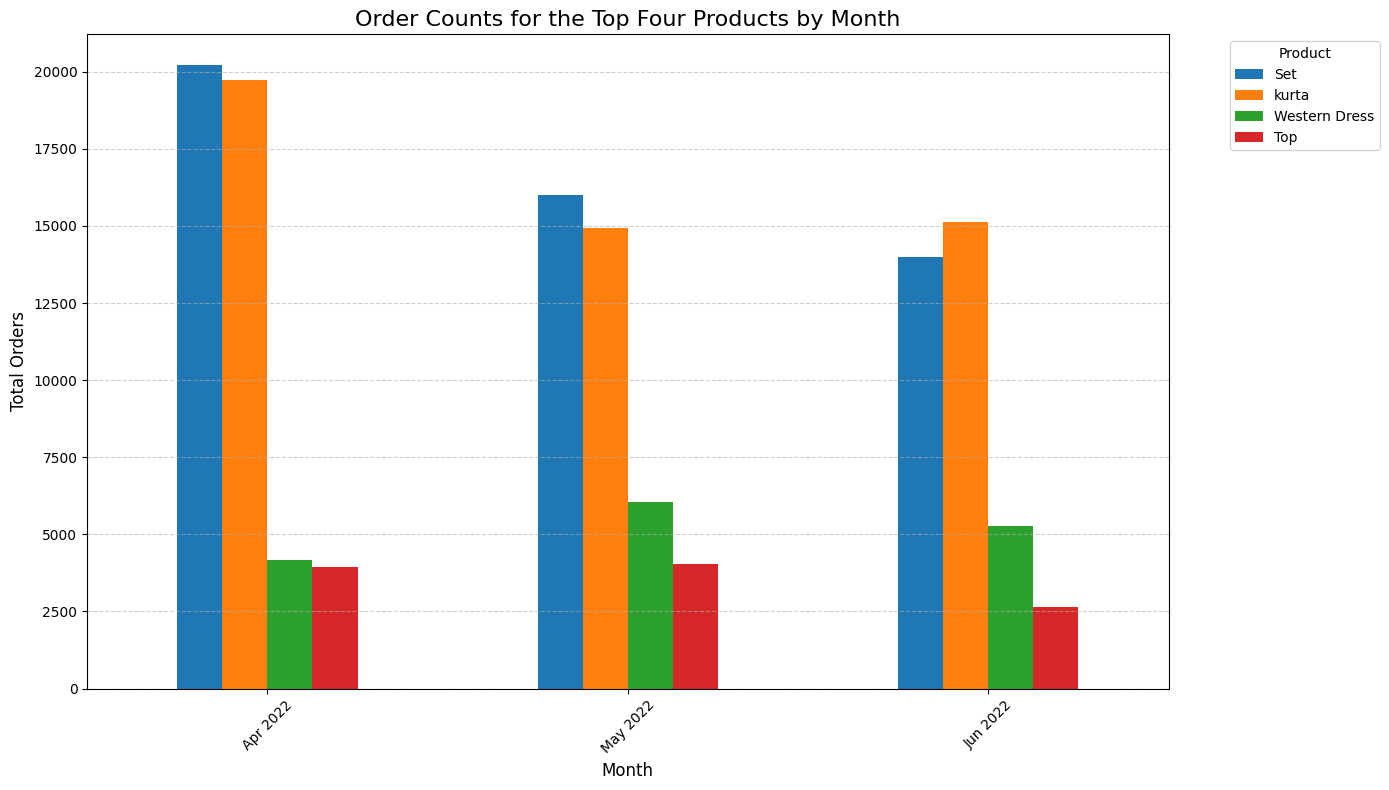

In [30]:
# Filter the dataset for top 4 products
top_products = ["Set", "kurta", "Western Dress", "Top"]

# Format 'Month' column
df_Amazon_Report_edit['Month'] = df_Amazon_Report_edit['Date'].dt.strftime('%b')

# Group by Month and Category, and calculate the order count
products_order_count = df_Amazon_Report_edit.groupby(['Month', 'Category'])['Amount'].count().reset_index()
products_order_count.rename(columns={'Amount': 'Order_Count'}, inplace=True)

# Filter data for the top 4 products
products_order_count = products_order_count[products_order_count['Category'].isin(top_products)]

# Exclude March
products_order_count = products_order_count[products_order_count['Month'] != 'Mar']

# Ensure the 'Month' column has the correct order for the remaining months
month_order = ['Apr', 'May', 'Jun']
products_order_count['Month'] = pd.Categorical(products_order_count['Month'], categories=month_order, ordered=True)

# Pivot the data for plotting
products_order_count_pivot = products_order_count.pivot(index='Month', columns='Category', values='Order_Count')

# Calculate the total order count for each product
product_totals = products_order_count.groupby('Category')['Order_Count'].sum()

# Sort columns in descending order based on total order count
sorted_columns = product_totals.sort_values(ascending=False).index
products_order_count_pivot = products_order_count_pivot[sorted_columns]

# Ensure the rows are sorted by 'Month' in the correct order
products_order_count_pivot = products_order_count_pivot.loc[month_order]

print(products_order_count_pivot)

# Define the colors to match the previous code's colors for each product (using 'tab10' colormap)
colormap = plt.cm.tab10
colors = [colormap(i) for i in range(len(products_order_count_pivot.columns))]

# Plot the column graph
plt.figure(figsize=(14, 8))
products_order_count_pivot.plot(kind='bar', stacked=False, figsize=(14, 8), color=colors)

plt.title('Order Counts for the Top Four Products by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel("Total Orders", fontsize=12)
plt.xticks(ticks=range(len(month_order)), labels=[f"{month} 2022" for month in month_order], rotation=45)  
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(visible=True, linestyle='--', alpha=0.6, axis='y')

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

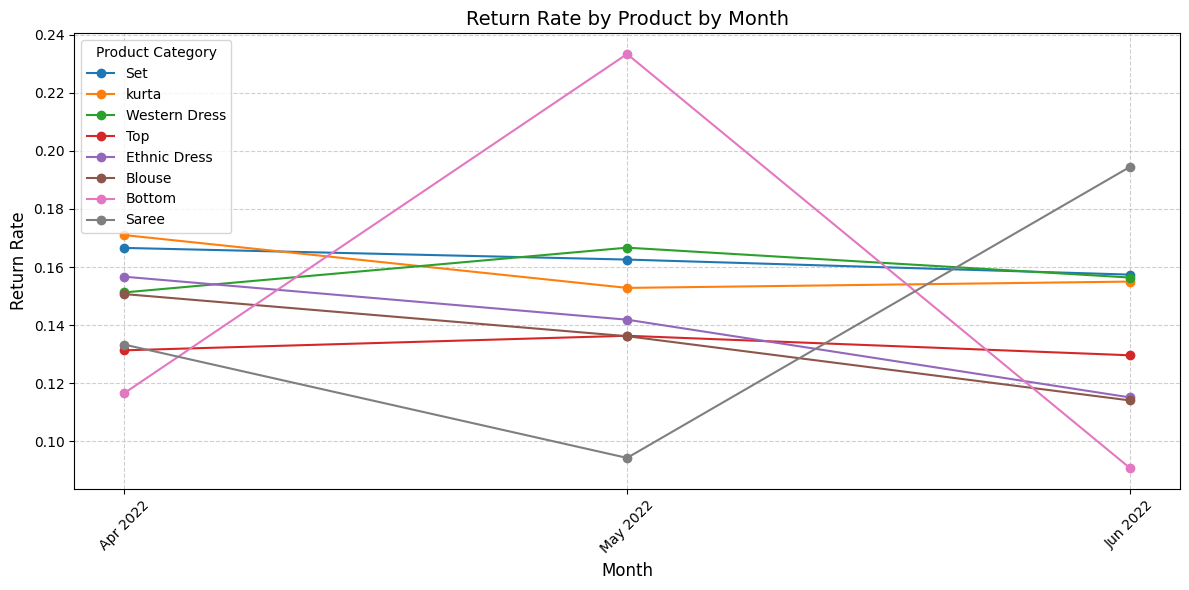

In [31]:
# Refund/Return Rate over time (also breakdown by category)

# Define statuses related to returns, refunds, and cancellations
return_statuses = [
    "Cancelled",
    "Shipped - Returned to Seller",
    "Shipped - Returning to Seller",
    "Shipped - Rejected by Buyer",
    "Shipped - Lost in Transit",
    "Shipped - Damaged"
]

# Create a new column for the 'Month'
df_Amazon_Report_edit['Month'] = df_Amazon_Report_edit['Date'].dt.to_period('M')

# Exclude March
df_without_March = df_Amazon_Report_edit[df_Amazon_Report_edit['Month'] != '2022-03']

# Filter the dataframe to include only returns, cancellations, etc.
returns_df = df_without_March[df_without_March['Status'].isin(return_statuses)]

# Group by Month, Category, and calculate the count of each product's returns
returns_by_month = returns_df.groupby(['Month', 'Category']).size().reset_index(name='Return_Count')

# Group by Month and Category for total orders
total_orders_by_month = df_without_March.groupby(['Month', 'Category']).size().reset_index(name='Total_Count')

# Convert 'Month' to string for both DataFrames to ensure compatibility
returns_by_month['Month'] = returns_by_month['Month'].astype(str)
total_orders_by_month['Month'] = total_orders_by_month['Month'].astype(str)

# Merge the return count and total orders dataframes on 'Month' and 'Category'
merged_df = pd.merge(returns_by_month, total_orders_by_month, on=['Month', 'Category'])

# Calculate the return rate (refund/return/cancellation rate)
merged_df['Return_Rate'] = merged_df['Return_Count'] / merged_df['Total_Count']

# Pivot the data for plotting (so each category will be a separate line in the plot)
pivot_df = merged_df.pivot(index='Month', columns='Category', values='Return_Rate')

# Create the product totals sorted in descending order for consistency with "Product Sales by Month"
product_totals = returns_df.groupby('Category').size().sort_values(ascending=False).index

# Sort the pivot table columns by the product totals
pivot_df = pivot_df[product_totals]

# Use tab10 colormap to get consistent colors
colormap = plt.cm.tab10
colors = [colormap(i) for i in range(len(pivot_df.columns))]

# Plot the return rate over time for each category
plt.figure(figsize=(12, 6))
pivot_df.plot(kind='line', marker='o', linestyle='-', figsize=(12, 6), color=colors)

plt.title("Return Rate by Product by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Return Rate", fontsize=12)
plt.xticks(ticks=range(len(pivot_table.index)), labels=pivot_table.index.strftime('%b %Y'), rotation=45)
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend(title="Product Category")

plt.tight_layout()
plt.show()

# **EDA for Customer Metrics**

In [32]:
# Create table for B2B and B2C channels sales, orders, and AOV

# Formatting: Add CSS for white background and styling
custom_css1 = """
<h3>Sales and Orders for B2B and B2C Channels</h3>
<style>
    /* Force white background and text color for the entire table */
    table {
        border-collapse: collapse;
        margin: 25px 0;
        font-size: 16px;
        font-family: Arial, sans-serif;
        min-width: 400px;
        box-shadow: 0 0 20px rgba(0, 0, 0, 0.15);
        background-color: white !important; /* Force white background */
        color: black !important; /* Ensure black text */
    }

    /* Header row styling */
    table thead tr {
        background-color: #d3d3d3;  /* Darker grey background for header */
        color: black;  /* Black text for header */
        text-align: left;
    }

    /* Style for header and body cells */
    table th, table td {
        padding: 12px 15px;
        border: 1px solid #ddd;  /* Border for better separation */
    }

    /* Style for body rows */
    table tbody tr {
        background-color: white !important;  /* Enforce white background */
        color: black !important;  /* Ensure black text */
    }

    /* Striped rows (alternate colors) */
    table tbody tr:nth-of-type(even) {
        background-color: #f3f3f3 !important;  /* Light gray for even rows */
    }

    /* Highlight row on hover */
    table tbody tr:hover {
        background-color: #f1f1f1 !important;
    }

</style>
"""

In [33]:
# Create Sales and Orders for B2B and B2C Channels table
# Group data by 'B2B' to calculate Total Amount, Order Count, and AOV
summary_table = df_Amazon_Report_edit.groupby('B2B').agg(
    Total_Amount=('Amount', 'sum'),
    Order_Count=('Amount', 'count')
).reset_index()

# Calculate Average Order Value (AOV)
summary_table['Average_Order_Value'] = summary_table['Total_Amount'] / summary_table['Order_Count']

# Map 'B2B' values to descriptive labels
summary_table['Customer_Type'] = summary_table['B2B'].map({1: 'B2B', 0: 'B2C'})

# Select and reorder columns for display
summary_table = summary_table[['Customer_Type', 'Total_Amount', 'Order_Count', 'Average_Order_Value']]

# Format values for display
summary_table['Total_Amount'] = summary_table['Total_Amount'].map('₹{:,.0f}'.format)
summary_table['Average_Order_Value'] = summary_table['Average_Order_Value'].map('₹{:,.0f}'.format)

# Create the HTML table
html_table = summary_table.to_html(
    index=False,
    escape=False,
    justify='center',
    classes='styled-table',
    border=0
)

# Generate HTML table and combine with the custom CSS
styled_html_table2 = custom_css1 + html_table

# Display the table with custom styling
display(HTML(styled_html_table2))

Customer_Type,Total_Amount,Order_Count,Average_Order_Value
NaN,"₹82,695,556",128097,₹646
NaN,"₹608,161",871,₹698
